In [1]:
import os
import inspect
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import scanpy as sc
import tqdm
import sys
import numpy as np
import sklearn
import scipy
import warnings
warnings.filterwarnings(action='once')
from scib_metrics.benchmark import Benchmarker

sc.settings.figdir=os.path.expanduser('~/WbFigures/DevIntegrations')
sc._settings.settings._vector_friendly=True
plt.rcParams.update({
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'font.family': 'DejaVu Sans',
    'font.sans-serif': 'DejaVuSansMono',
    'pdf.fonttype': 42
})

sys.path.append('/home/matthew.schmitz/utils/mts-utils/')
from genomics import sc_analysis

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on {device}")
if device.type == 'cuda':
    print("GPU count:", torch.cuda.device_count())
    print("GPU name:", torch.cuda.get_device_name(0))

/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu2/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu2/lib/python3.13/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


not all packages available
Running on cpu


In [2]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
seaborn.set_theme(style="ticks", rc=custom_params)

In [3]:
adata=sc.read_h5ad('/home/matthew.schmitz/Matthew/models/1.9.1.8.5_Dev_final_600clusters/analysis_inprogress.h5ad',backed='r')

In [4]:
out_reductions='/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/models/DevIntegrations'

In [5]:
batch_key='batch_name'
discov_key='species'
layer_key='spliced'
MDE_KEY = "X_antipode_UMAP"

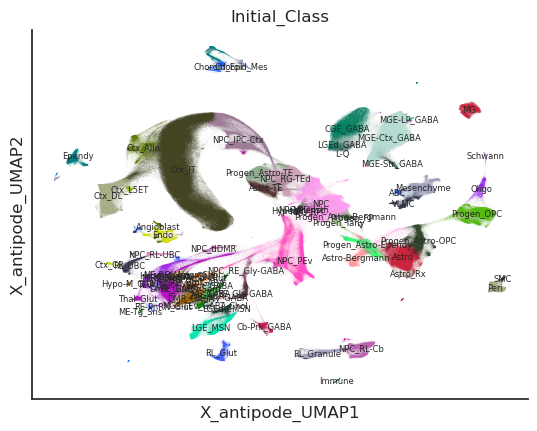

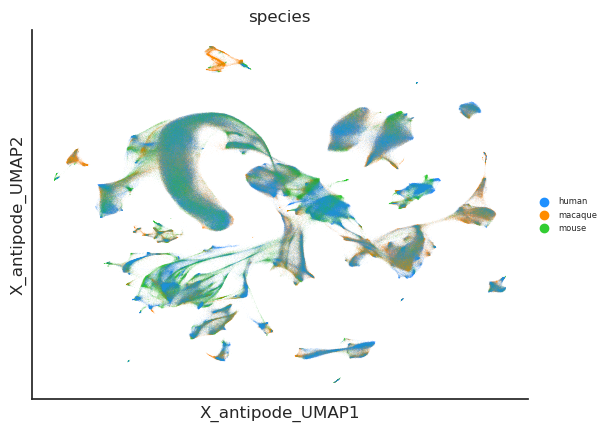

In [6]:
sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    color=["Initial_Class"],legend_fontsize=6,legend_fontweight='normal',
    legend_loc='on data'
)

sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    color=[discov_key],legend_fontsize=6,legend_fontweight='normal'
)


In [6]:
# %%time
# import scvi
# #adata=sc.read_h5ad('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/models/1.9.1.8.1_PsiNormal-Smallerencoder-Tighter-final/p4_adata.h5ad',backed='r')
# scvi_model=scvi.model.SCVI.load('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/models/SCVI_Dev.scvi',adata=adata) 
# SCVI_LATENT_KEY = "X_SCVI"
# print('loaded')
# adata.obsm[SCVI_LATENT_KEY] = scvi_model.get_latent_representation(adata)

# np.savetxt(os.path.join(out_reductions,"X_SCVI.csv"), adata.obsm["X_SCVI"], delimiter=",")

In [7]:
# import scanorama
# import pyliger
import harmony
from harmony import harmonize

In [8]:
sc.pp.scale(adata,zero_center=False)
sc.pp.pca(adata)

In [9]:
%%time

adata.obsm["X_harmony"] = harmonize(adata.obsm["X_pca"], adata.obs, batch_key=discov_key)
np.savetxt(os.path.join(out_reductions,"X_pca.csv"), adata.obsm["X_pca"], delimiter=",")
np.savetxt(os.path.join(out_reductions,"X_harmony.csv"), adata.obsm["X_harmony"], delimiter=",")

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
	Completed 7 / 10 iteration(s).
Reach convergence after 7 iteration(s).
CPU times: user 1h 26min 24s, sys: 58min 12s, total: 2h 24min 36s
Wall time: 1h 17min 34s


In [10]:
# %%time
# import scanorama
# # List of adata per batch
# batch_cats = adata.obs[discov_key].cat.categories
# adata_list = [adata[adata.obs[discov_key] == b].copy() for b in batch_cats]
# scanorama.integrate_scanpy(adata_list)

# adata.obsm["X_Scanorama"] = np.zeros((adata.shape[0], adata_list[0].obsm["X_scanorama"].shape[1]))
# for i, b in enumerate(batch_cats):
#     adata.obsm["X_Scanorama"][adata.obs[discov_key] == b] = adata_list[i].obsm["X_scanorama"]


In [11]:
# %%time

# bdata = adata.copy()
# # Pyliger normalizes by library size with a size factor of 1
# # So here we give it the count data
# bdata.X = bdata.layers["spliced"]
# # List of adata per batch
# batch_cats = adata.obs[discov_key].cat.categories
# adata_list = [bdata[bdata.obs[discov_key] == b].copy() for b in batch_cats]
# for i, ad in enumerate(adata_list):
#     ad.uns["sample_name"] = batch_cats[i]
#     # Hack to make sure each method uses the same genes
#     ad.uns["var_gene_idx"] = np.arange(bdata.n_vars)


# liger_data = pyliger.create_liger(adata_list, remove_missing=False, make_sparse=False)
# # Hack to make sure each method uses the same genes
# liger_data.var_genes = bdata.var_names
# pyliger.normalize(liger_data)
# pyliger.scale_not_center(liger_data)
# pyliger.optimize_ALS(liger_data, k=30)
# pyliger.quantile_norm(liger_data)


# adata.obsm["X_liger"] = np.zeros((adata.shape[0], liger_data.adata_list[0].obsm["H_norm"].shape[1]))
# for i, b in enumerate(batch_cats):
#     adata.obsm["X_liger"][adata.obs[discov_key] == b] = liger_data.adata_list[i].obsm["H_norm"]


In [12]:
obsm_keys=["X_pca", "X_Scanorama", "X_liger", "X_harmony", "X_scVI", "X_antipode"]
obsm_keys=[x for x in obsm_keys if x in adata.obsm.keys()]
for x in obsm_keys:
    try:
        np.savetxt(os.path.join(out_reductions,x+".csv"), adata.obsm[x], delimiter=",")
    except:
        print(x,'FAILED')


# Downstream Analysis

In [6]:
obsm_keys=["X_pca", "X_Scanorama", "X_liger", "X_harmony", "X_scVI", "X_antipode"]
for x in obsm_keys:
    print(x)
    try:
        adata.obsm[x]=np.loadtxt(os.path.join(out_reductions,x+".csv"), delimiter=",")
        MDE_KEY = x+"_UMAP"
        adata.obsm[MDE_KEY]=np.loadtxt(os.path.join(out_reductions,MDE_KEY+".csv"), delimiter=",")
    except:
        print(x,'FAILED')
obsm_keys = [x for x in obsm_keys if x in adata.obsm.keys()]

X_pca
X_Scanorama
X_Scanorama FAILED
X_liger
X_liger FAILED
X_harmony
X_scVI
X_antipode


/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu2/lib/python3.13/site-packages/cudf/utils/gpu_utils.py:162: UserWarning: No NVIDIA GPU detected
  warnings.warn("No NVIDIA GPU detected")


X_pca


saving figure to file /home/matthew.schmitz/WbFigures/DevIntegrations/X_pca_UMAP_Initial_Class.pdf


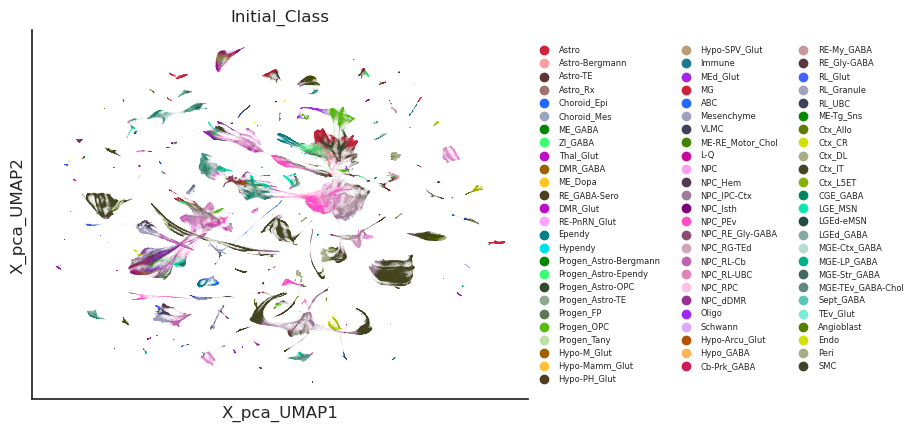

saving figure to file /home/matthew.schmitz/WbFigures/DevIntegrations/X_pca_UMAP_species.pdf


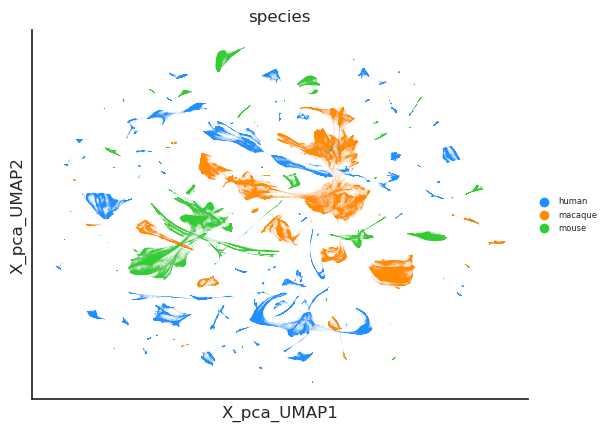

X_harmony


saving figure to file /home/matthew.schmitz/WbFigures/DevIntegrations/X_harmony_UMAP_Initial_Class.pdf


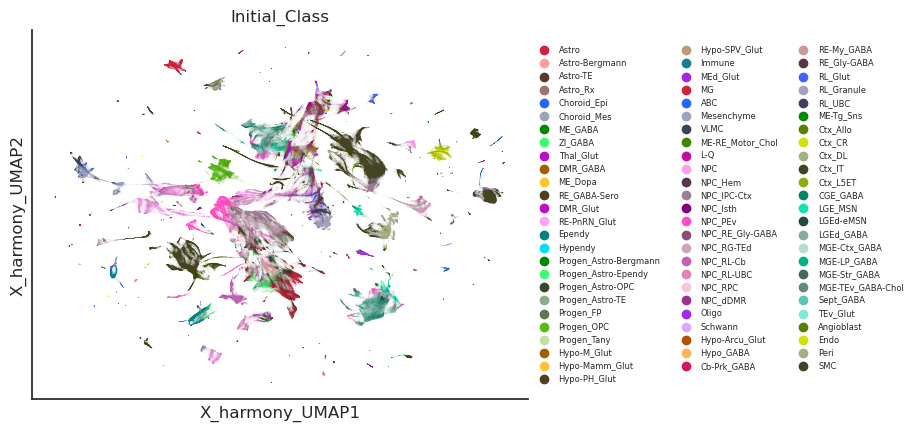

saving figure to file /home/matthew.schmitz/WbFigures/DevIntegrations/X_harmony_UMAP_species.pdf


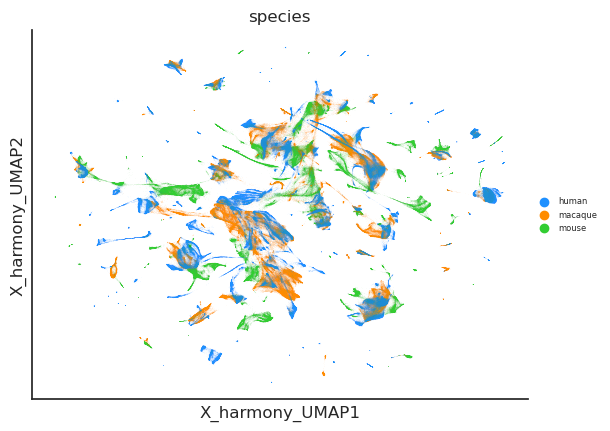

X_scVI


saving figure to file /home/matthew.schmitz/WbFigures/DevIntegrations/X_scVI_UMAP_Initial_Class.pdf


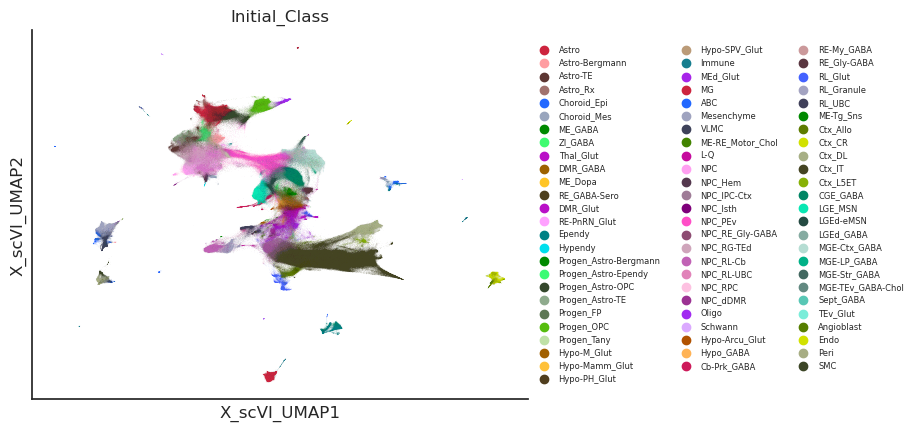

saving figure to file /home/matthew.schmitz/WbFigures/DevIntegrations/X_scVI_UMAP_species.pdf


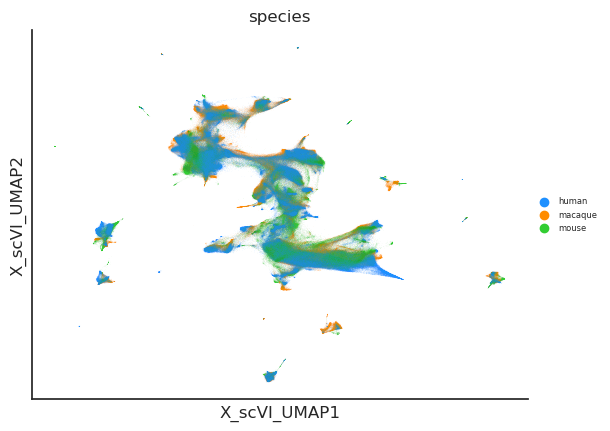

X_antipode


saving figure to file /home/matthew.schmitz/WbFigures/DevIntegrations/X_antipode_UMAP_Initial_Class.pdf


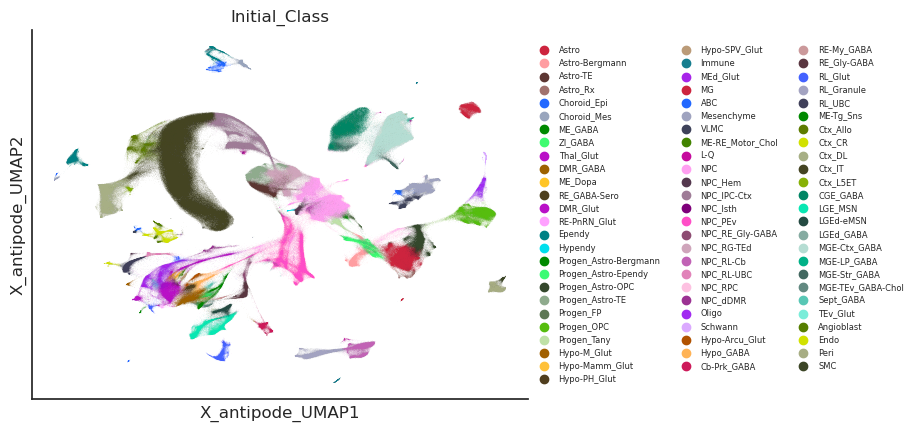

saving figure to file /home/matthew.schmitz/WbFigures/DevIntegrations/X_antipode_UMAP_species.pdf


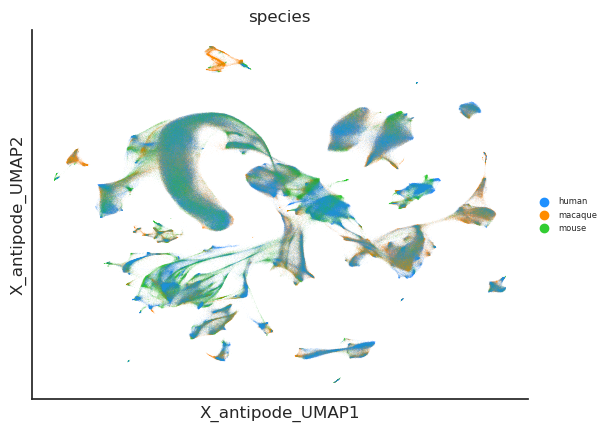

In [7]:
import cuml
plot_obsm_keys=["X_pca", "X_Scanorama", "X_liger", "X_harmony", "X_scVI",'X_antipode']
plot_obsm_keys = [x for x in plot_obsm_keys if x in adata.obsm.keys()]

for x in plot_obsm_keys:
    print(x)
    # try:
    MDE_KEY = x+"_UMAP"
    if not MDE_KEY in adata.obsm.keys():
        
        umap = cuml.UMAP(n_neighbors = 60)
        adata.obsm[MDE_KEY] = umap.fit_transform(adata.obsm[x])
        torch.cuda.empty_cache()
        np.savetxt(os.path.join(out_reductions,MDE_KEY+".csv"), adata.obsm[MDE_KEY], delimiter=",")
    sc.pl.embedding(
        adata,
        basis=MDE_KEY,
        color=["Initial_Class"],legend_fontsize=6,legend_fontweight='normal',
        save=f'_{"Initial_Class"}.pdf'
    )
    
    sc.pl.embedding(
        adata,
        basis=MDE_KEY,
        color=[discov_key],legend_fontsize=6,legend_fontweight='normal',save=f'_{discov_key}.pdf'
    )
    # except:
    #     print(x,'FAILED')

In [9]:
# obsm_keys=[x for x in obsm_keys if x in adata.obsm.keys()]
# # xdata=sc_analysis.select_k_cells(adata,'level_2',100000)
# output_dir=os.path.join(sc.settings.figdir,'level_2')
# try:
#     os.mkdir(output_dir)
# except:
#     pass
# bm = Benchmarker(
#     adata,
#     batch_key="batch_name",
#     label_key="level_2",
#     embedding_obsm_keys=obsm_keys,
#     n_jobs=1,
# )
# bm.benchmark()
# bm.plot_results_table(save_dir=output_dir)
# bm.plot_results_table(save_dir=output_dir,min_max_scale=False)

Computing neighbors:   0%|          | 0/4 [00:00<?, ?it/s]/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu/lib/python3.13/site-packages/cuml/internals/api_decorators.py:218: UserWarning: 
  return func(*args, **kwargs)
Metrics:  20%|██        | 2/10 [01:31<06:55, 51.96s/it, Bio conservation: clisi_knn]       /home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu/lib/python3.13/site-packages/chex/_src/dataclass.py:302: DeprecationWarning: unzip2 was deprecated in JAX v0.6.0 and will be removed in JAX v0.7.0.
  flatten = lambda d: jax.util.unzip2(sorted(d.__dict__.items()))[::-1]

Metrics:  50%|█████     | 5/10 [02:51<02:35, 31.15s/it, Batch correction: kbet_per_label]

INFO     98 clusters consist of a single batch or are too small. Skip.                                             


/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu/lib/python3.13/site-packages/scib_metrics/metrics/_kbet.py:212: RuntimeWarning: Mean of empty slice
  final_score = np.nanmean(kbet_scores["kBET"])

Metrics:  60%|██████    | 6/10 [03:00<01:33, 23.43s/it, Batch correction: graph_connectivity]/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu/lib/python3.13/site-packages/scib_metrics/metrics/_graph_connectivity.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)

Embeddings:  25%|██▌       | 1/4 [03:05<09:16, 185.39s/it]tch correction: pcr_comparison]
                                                                                         
Metrics:  50%|█████     | 5/10 [01:37<01:00, 12.19s/it, Batch correction: kbet_per_label]

INFO     98 clusters consist of a single batch or are too small. Skip.                                             


/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu/lib/python3.13/site-packages/scib_metrics/metrics/_kbet.py:212: RuntimeWarning: Mean of empty slice
  final_score = np.nanmean(kbet_scores["kBET"])

Metrics:  60%|██████    | 6/10 [01:44<00:41, 10.43s/it, Batch correction: graph_connectivity]/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu/lib/python3.13/site-packages/scib_metrics/metrics/_graph_connectivity.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)

Embeddings:  50%|█████     | 2/4 [04:53<04:39, 139.74s/it]tch correction: pcr_comparison]
                                                                                         
Metrics:  50%|█████     | 5/10 [02:02<01:20, 16.18s/it, Batch correction: kbet_per_label]

INFO     98 clusters consist of a single batch or are too small. Skip.                                             


/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu/lib/python3.13/site-packages/scib_metrics/metrics/_kbet.py:212: RuntimeWarning: Mean of empty slice
  final_score = np.nanmean(kbet_scores["kBET"])

Metrics:  60%|██████    | 6/10 [02:10<00:52, 13.14s/it, Batch correction: graph_connectivity]/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu/lib/python3.13/site-packages/scib_metrics/metrics/_graph_connectivity.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)

Embeddings:  75%|███████▌  | 3/4 [07:07<02:17, 137.36s/it]tch correction: pcr_comparison]
                                                                                         
Metrics:  50%|█████     | 5/10 [05:45<03:39, 43.96s/it, Batch correction: kbet_per_label]

INFO     98 clusters consist of a single batch or are too small. Skip.                                             


/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu/lib/python3.13/site-packages/scib_metrics/metrics/_kbet.py:212: RuntimeWarning: Mean of empty slice
  final_score = np.nanmean(kbet_scores["kBET"])

Metrics:  60%|██████    | 6/10 [05:52<02:05, 31.42s/it, Batch correction: graph_connectivity]/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu/lib/python3.13/site-packages/scib_metrics/metrics/_graph_connectivity.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)

Embeddings: 100%|██████████| 4/4 [13:05<00:00, 196.38s/it]tch correction: pcr_comparison]

                                                                                         /home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axi

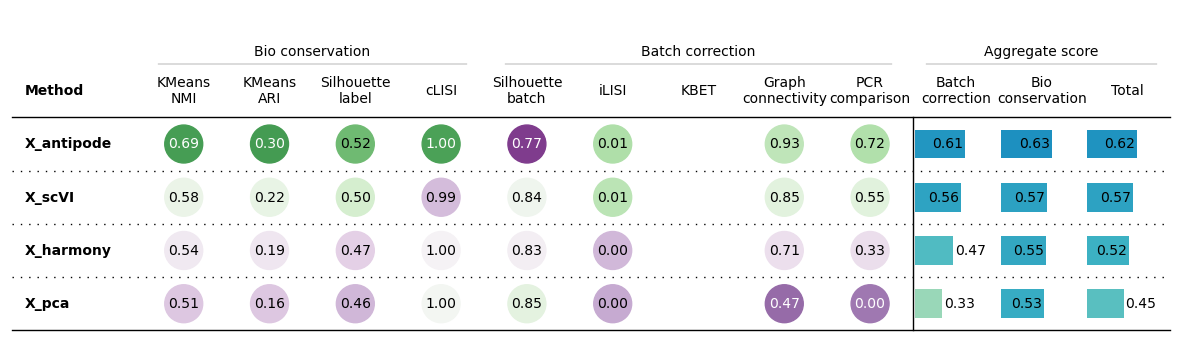

Time: 13 min 25 sec


In [10]:
# conda create -n rapids-25.06 -c integrations_gpu -c conda-forge -c nvidia  \
#     rapids=25.06 python=3.13 'cuda-version>=12.0,<=12.8'
# pip install scanpy scib scib-metrics harmony-pytorch
from scib_metrics.nearest_neighbors import NeighborsResults
from scib_metrics.benchmark import Benchmarker, BioConservation, BatchCorrection
xdata=sc_analysis.select_k_cells(adata,'level_2',500_000)

output_dir=os.path.join(sc.settings.figdir,'Initial_Class_markers')
try:
    os.mkdir(output_dir)
except:
    pass


from cuml.neighbors import NearestNeighbors
import numpy as np

def cuml_brute_force_nn(X: np.ndarray, k: int):
    """
    GPU brute‐force kNN using RAPIDS cuML.
    Returns exactly the k nearest neighbors for each row of X.
    """
    # cuML wants float32
    X32 = np.asarray(X, dtype=np.float32, order='C')
    # force a NumPy return so scIB can read it directly
    nn = NearestNeighbors(
        n_neighbors=k,
        algorithm='brute',
        metric='euclidean',
        output_type='numpy'
    )
    nn.fit(X32)
    distances, indices = nn.kneighbors(X32)
    return NeighborsResults(indices=indices.astype(np.int64),
                            distances=distances)


def cuml_ivfflat_nn(X: np.ndarray, k: int, nlist: int = 100, nprobe: int = 10):
    """
    GPU approximate kNN via IVF‐flat.
      • nlist  = # of Voronoi cells in the index
      • nprobe = # of cells to search at query time
    """
    X32 = np.asarray(X, dtype=np.float32, order='C')
    algo_params = {'nlist': nlist, 'nprobe': nprobe}
    nn = NearestNeighbors(
        n_neighbors=k,
        algorithm='ivfflat',
        metric='euclidean',
        algo_params=algo_params,
        output_type='numpy'
    )
    nn.fit(X32)
    distances, indices = nn.kneighbors(X32)
    return NeighborsResults(indices=indices.astype(np.int64),
                            distances=distances)
    
import time


biocons = BioConservation(isolated_labels=False)

start = time.time()
bm = Benchmarker(
    xdata,
    batch_key="batch_name",
    label_key="Initial_Class_markers",
    embedding_obsm_keys=obsm_keys,
    pre_integrated_embedding_obsm_key="X_pca",
    bio_conservation_metrics=biocons,
    batch_correction_metrics=BatchCorrection(),
    n_jobs=-1,
)
bm.prepare(neighbor_computer=cuml_ivfflat_nn)
bm.benchmark()
end = time.time()
# bm.plot_results_table(save_dir=output_dir)
bm.plot_results_table(save_dir=output_dir,min_max_scale=False)
print(f"Time: {int((end - start) / 60)} min {int((end - start) % 60)} sec")


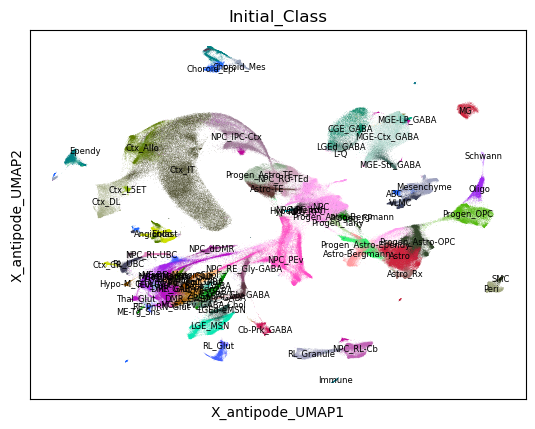

In [11]:
sc.pl.embedding(
    xdata,
    basis='X_antipode_UMAP',
    color=["Initial_Class"],legend_fontsize=6,legend_fontweight='normal',
    legend_loc='on data'
)


In [12]:
df = bm.get_results(min_max_scale=False)
df.to_csv(os.path.join(output_dir,'scib-metrics.csv'))

In [23]:
obsm_keys=["X_pca", "X_Scanorama", "X_liger", "X_harmony", "X_scVI", "X_antipode"]
for x in obsm_keys:
    print(x)
    try:
        adata.obsm[x]=np.loadtxt(os.path.join(out_reductions,x+".csv"), delimiter=",")
    except:
        print(x,'FAILED')

X_pca
X_Scanorama
X_Scanorama FAILED
X_liger
X_liger FAILED
X_harmony
X_scVI
X_antipode


In [14]:
import numpy as np
import scipy.stats
from cuml.neighbors import NearestNeighbors
import tqdm

def taxonomy_entropy(
    adata,
    annotations,
    nearest_neighbors: int = 15,
    dim: str = "X_scVI",
    algorithm: str = "brute",
    algo_params: dict = None,
):
    """
    Compute entropy (mixing) of annotations within each cell's local neighborhood,
    using cuML NearestNeighbors on the GPU.

    Args:
        adata: AnnData with `annotations` in .obs and embeddings in .obsm[dim].
        annotations: list of str, names of .obs columns to score.
        nearest_neighbors: k for kNN.
        dim: which embedding in adata.obsm to use.
        algorithm: one of 'brute', 'ivfflat', 'auto', etc.
        algo_params: dict of algorithm‐specific params (e.g. {'nlist':100,'nprobe':10}).
    Returns:
        The same AnnData, with new .obs columns named f"{dim}_{anno}_entropy".
    """
    # prepare data
    X = np.asarray(adata.obsm[dim], dtype=np.float32, order='C')
    algo_params = algo_params or {}

    # build and query GPU kNN
    nn = NearestNeighbors(
        n_neighbors=nearest_neighbors,
        algorithm=algorithm,
        metric="euclidean",
        algo_params=algo_params,
        output_type="numpy",
    )
    nn.fit(X)
    distances, indices = nn.kneighbors(X)
    # indices: (n_cells, k) array of neighbor‐indices

    # for each annotation, compute per‐cell entropy
    for anno in annotations:
        col = f"{dim}_{anno}_entropy"
        entropy_vals = []
        for nbrs in tqdm.tqdm(indices, desc=f"Entropy for {anno}"):
            freqs = (
                adata.obs.iloc[nbrs][anno]
                .value_counts(normalize=True)
                .values
            )
            entropy_vals.append(scipy.stats.entropy(freqs))
        adata.obs[col] = entropy_vals

    return adata


In [15]:
xdata = xdata.to_memory()

In [19]:
obsm_keys = [x for x in obsm_keys if x in adata.obsm.keys()]
for x in obsm_keys:
    print(x)
    # try:
    xdata=taxonomy_entropy(xdata,['species','batch_name'],nearest_neighbors = 30,dim=x)
    # except:
        # print(x,'FAILED')

X_pca


Entropy for batch_name: 100%|██████████| 499698/499698 [12:23<00:00, 671.69it/s]


X_harmony


Entropy for batch_name: 100%|██████████| 499698/499698 [15:15<00:00, 545.58it/s]


X_antipode


Entropy for batch_name: 100%|██████████| 499698/499698 [15:14<00:00, 546.41it/s]


In [25]:
df=xdata.obs.loc[:,[x for x in xdata.obs.columns if 'entropy' in x]].melt()
df.columns=['variable','entropy']
df['color'] = df['variable'].str.split('_').str[1]

/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu/lib/python3.13/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu/lib/python3.13/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu/lib/python3.13/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/home/matthew.schmitz/Matthew/utils/miniforge3/envs/integrations_gpu/lib/python3.13/site-packages/seaborn/categorical.py:700: P

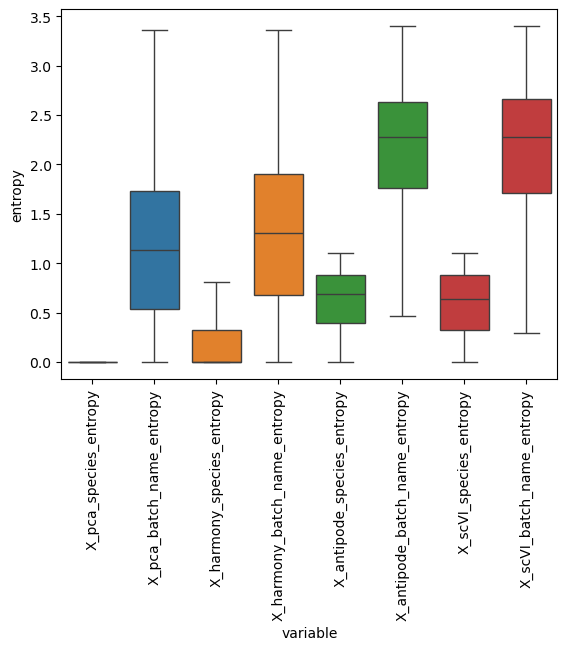

In [26]:
seaborn.boxplot(data=df,x='variable',y='entropy',hue='color',legend=None,showfliers=False)
plt.xticks(rotation=90)
plt.savefig(os.path.join(sc.settings.figdir,'entropy_violins.svg'))
plt.show()

In [27]:
xdata.obs.loc[:,[x for x in xdata.obs.columns if 'entropy' in x]].to_csv(os.path.join(sc.settings.figdir,'entropy_table.csv'))